In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

apple = pd.read_csv('AAPL.csv', parse_dates=True,index_col=0)
apple.sort_index( ascending=False)

apple.resample('BME').mean()
#flow_of_funds = pd.read_csv('flow-of-funds.csv', parse_dates=True)

apple.index.dtype
#apple.tail()['Date']-apple.head()['Date']



dtype('<M8[ns]')

In [18]:
def plot_stock(stock, days, start=None, end=None ):
    df = pd.read_csv(stock +'.csv', parse_dates=True,index_col=0)
    df2 = df.sort_values('Date', ascending=True)
    df2.head(5)

    df2[ f'{days}d mvavg'] = df2['AdjClose'].rolling(window=days).mean()
    df2[ f'{days}d std'] = df2['AdjClose'].rolling(window=days).std()
    df2['UpperBand'] = df2[f'{days}d mvavg']+df2[f'{days}d std']*2
    df2['LowerBand'] = df2[f'{days}d mvavg']-df2[f'{days}d std']*2

    plt.style.use('fivethirtyeight')

    fig=plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    x_axis=df2[start:].index.get_level_values(0)

    ax.fill_between(x_axis,df2[start:end]['UpperBand'], df2[start:end]['LowerBand'], color='grey')

    ax.plot(x_axis,df2[start:end]['AdjClose'], color='black',lw=2)
    ax.plot(x_axis,df2[start:end][f'{days}d mvavg'], color='blue',lw=2)

    ax.set_title=f'{days}day Bolliger band for {stock}'
    ax.set_xlabel('Date (Year/Month)')
    ax.set_ylabel('Price (USD)')
    ax.plot

<bound method Axes.plot of <Axes: xlabel='Date (Year/Month)', ylabel='Price (USD)'>>

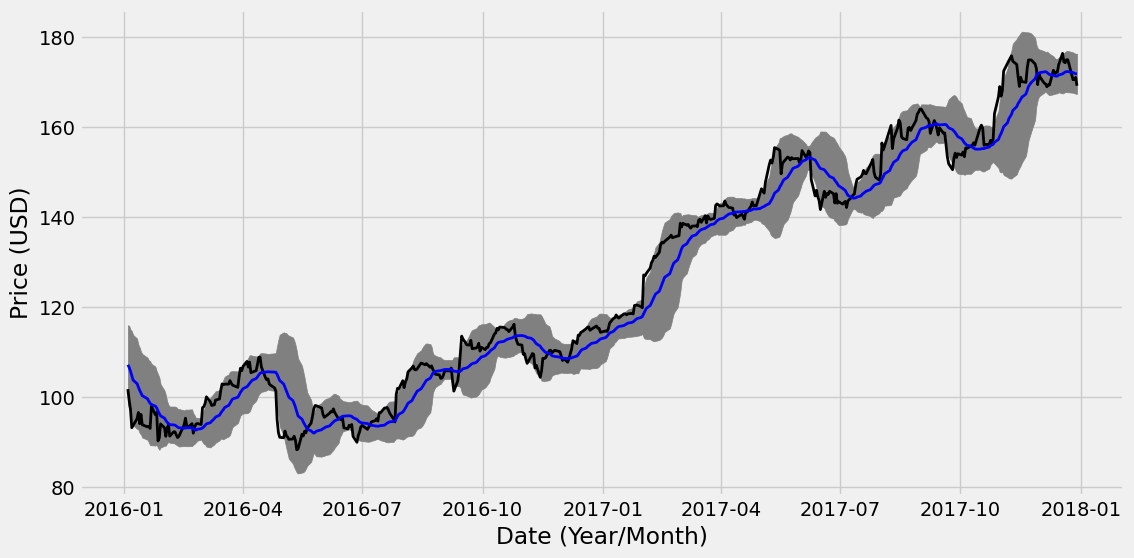

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv('AAPL.csv', parse_dates=True,index_col=0)
df2 = df.sort_values('Date', ascending=True)
df2.head(5)

df2['30d mvavg'] = df2['AdjClose'].rolling(window=21).mean()
df2['30d std'] = df2['AdjClose'].rolling(window=21).std()
df2['UpperBand'] = df2['30d mvavg']+df2['30d std']*2
df2['LowerBand'] = df2['30d mvavg']-df2['30d std']*2

plt.style.use('fivethirtyeight')

fig=plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
x_axis=df2['2016':].index.get_level_values(0)

ax.fill_between(x_axis,df2['2016':]['UpperBand'], df2['2016':]['LowerBand'], color='grey')

ax.plot(x_axis,df2['2016':]['AdjClose'], color='black',lw=2)
ax.plot(x_axis,df2['2016':]['30d mvavg'], color='blue',lw=2)

ax.set_title='30day Bolliger band for APPL'
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price (USD)')
ax.plot

ValueError: x and y must have same first dimension, but have shapes (1357,) and (2,)

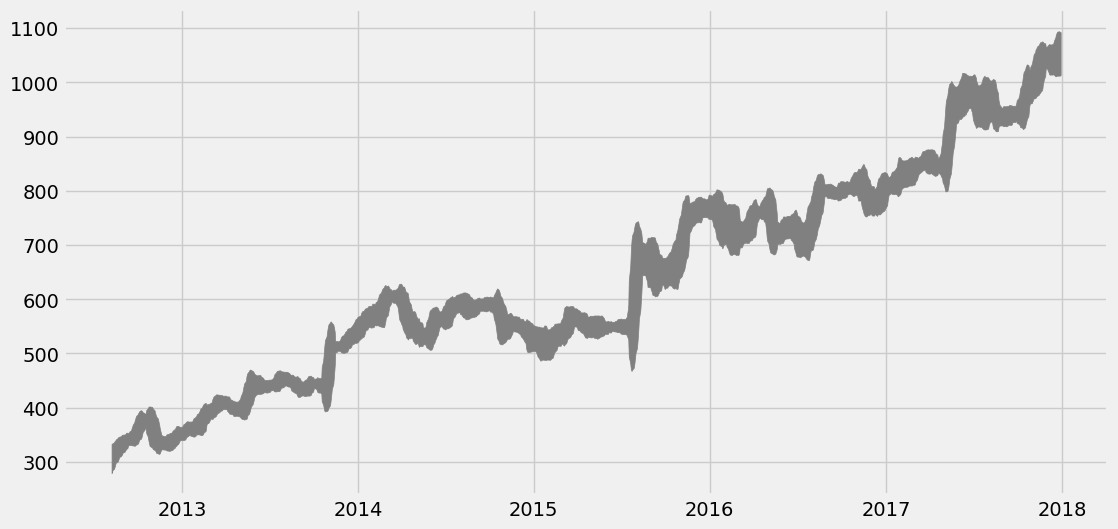

In [19]:
plot_stock('GOOGL', 21, 2008, 2010)